In [2]:
from sys import platform
import glob
import numpy as np
from src.utils import *
import pickle
import matplotlib.pyplot as plt
from plyfile import PlyData, PlyElement
import pandas as pd

In [3]:
import h5py
import os

In [4]:
from tqdm import tqdm

In [5]:
from jpype import *
import random
import math

In [6]:
jarLocation = "./infodynamics.jar"
startJVM(getDefaultJVMPath(), "-ea", "-Djava.class.path=" + jarLocation)

# Create a Kraskov TE calculator:
teCalcClass = JPackage("infodynamics.measures.continuous.kraskov").TransferEntropyCalculatorMultiVariateKraskov

teCalc = teCalcClass()
teCalc.setProperty(teCalcClass.PROP_AUTO_EMBED_METHOD, teCalcClass.AUTO_EMBED_METHOD_RAGWITZ)
#  b. Search range for embedding dimension (k) and delay (tau)
teCalc.setProperty(teCalcClass.PROP_K_SEARCH_MAX, "6")
teCalc.setProperty(teCalcClass.PROP_TAU_SEARCH_MAX, "6")

# Since we're auto-embedding, no need to supply k, l, k_tau, l_tau here:
teCalc.initialise(2, 2)


/opt/conda/lib/python3.7/site-packages/jpype/_core.py:209: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


source to desc :  -0.0607689418962849
desc to source :  -0.061922986218538645


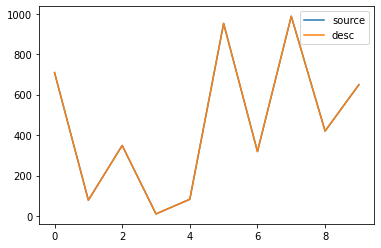

In [7]:
import random as r

# data_source = [[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2]]
# data_desc = [[0,0],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2]]
data_source = [[r.random()*1000,r.random()*1000] for i in range(5000)]

# data_source = [[r.random()*1000,r.random()*1000] for i in range(5000)]

# data_desc = [d for d in data_source[1:]] + [[0.0,0.0]] # source가 desc를 따라가는 경우
# data_desc = [[0.0,0.0]] + [d for d in data_source[:-1]]  #desc가 source를 따라가는 경우
# data_desc = [[d[0]*1.5, d[1]*1.5] for d in data_source] # 1.5배 큰 경우
data_desc = data_source   #같은 경우

teCalc.setObservations(data_source, data_desc)
teSourceToDesc = teCalc.computeAverageLocalOfObservations()

teCalc.setObservations(data_desc, data_source)
teDescToSource = teCalc.computeAverageLocalOfObservations()

print("source to desc : ", teSourceToDesc)
print("desc to source : ", teDescToSource)

from matplotlib import pyplot as plt
import numpy as np

data_source = np.array(data_source)
data_desc = np.array(data_desc)
plt.plot(data_source[...,0][:10], label = 'source')
plt.plot(data_desc[...,0][:10], label = 'desc')
plt.legend()
plt.show()

In [12]:
[[random()*10,random()*10] for i in range(20)]

TypeError: 'module' object is not callable